# Udemy Course Analysis & Recommendation System

## Data Collection & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('udemy_courses.csv')
# Initial data inspection
print('Number of rows and columns:', df.shape)

Number of rows and columns: (3678, 12)


In [3]:
print('First 5 rows of the dataset:')
df.head()

First 5 rows of the dataset:


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
print('Last 5 rows of the dataset:')
df.tail()

Last 5 rows of the dataset:


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [5]:
print('Info about the dataset')
df.info()

Info about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
print('Summary statistics:')
df.describe()

Summary statistics:


,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [7]:
print('Sum of null values:')
df.isnull().sum()

Sum of null values:


,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [8]:
#  removing unnecessary columns
df.drop('url',axis=1,inplace=True)

In [9]:
df.dtypes

,0
course_id,int64
course_title,object
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64
published_timestamp,object


In [10]:
# convert published_timestamp from object to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

## Performing Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Paid And Free Courses')

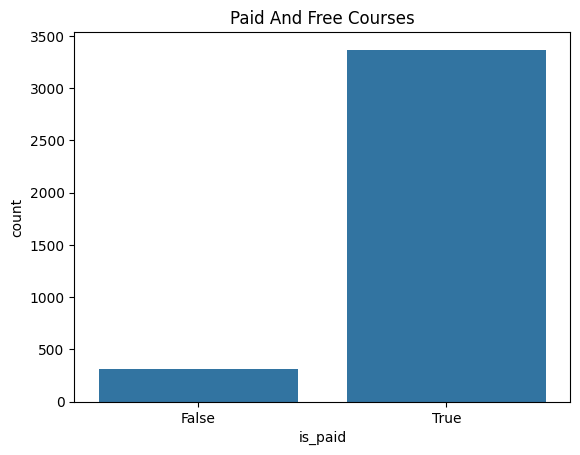

In [11]:
# free Vs Paid Courses
sns.countplot(x='is_paid',data=df)
plt.title('Paid And Free Courses')

Insight: Most courses are paid ones

<Axes: xlabel='level', ylabel='count'>

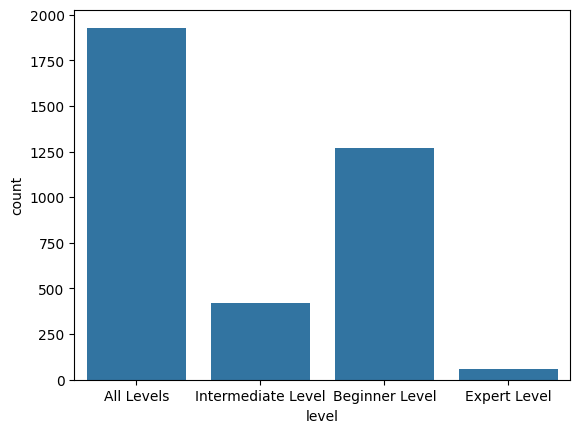

In [12]:
sns.countplot(x='level',data=df)

Insight: Most Of The Courses are All Levels , Need More From Expert Level

<Axes: xlabel='subject', ylabel='count'>

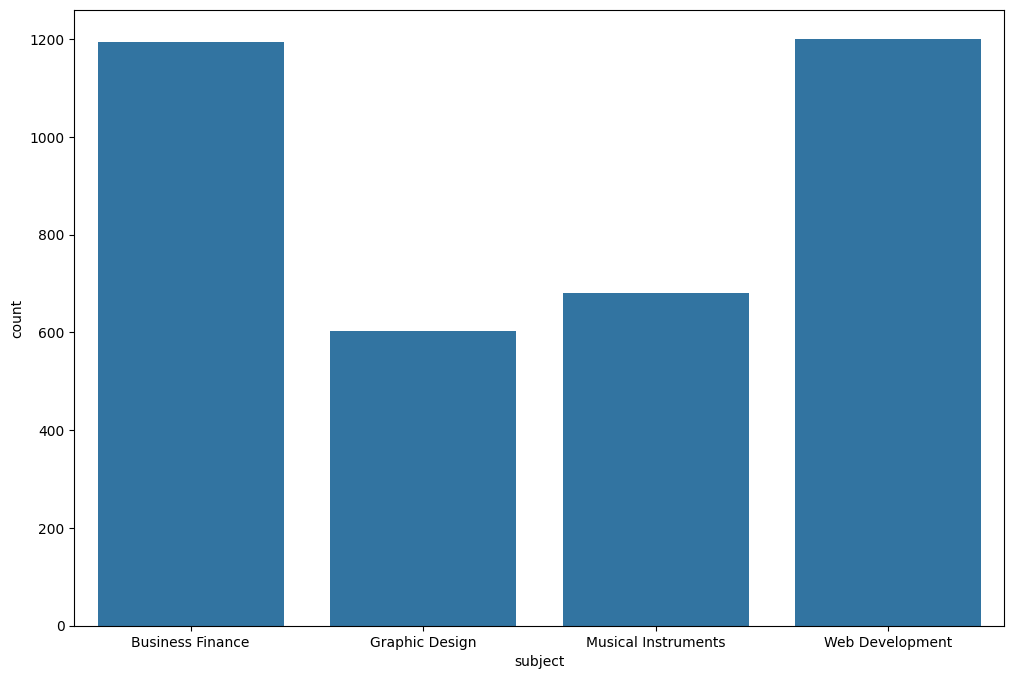

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='subject',data=df)

Insight: Most Of Students care about Business Finance & Web Development

In [14]:
df.select_dtypes(include=np.number).corr()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
price,0.142319,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.293450,0.161839,0.228889,0.801647,1.000000


<Axes: >

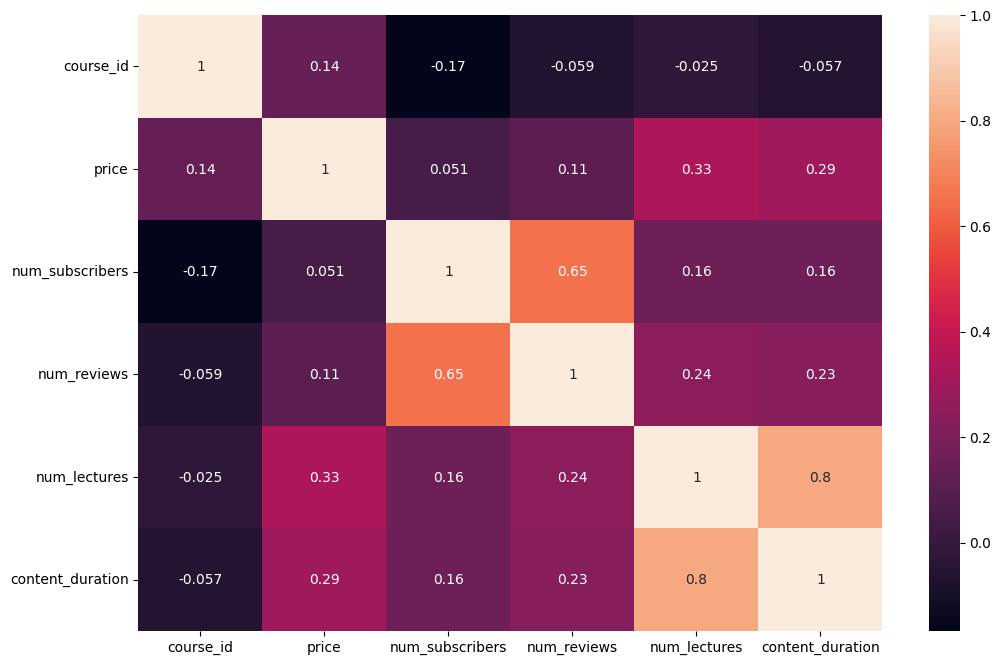

In [15]:
## See Correlation In Seaborn ColorMap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

<Axes: xlabel='price', ylabel='num_subscribers'>

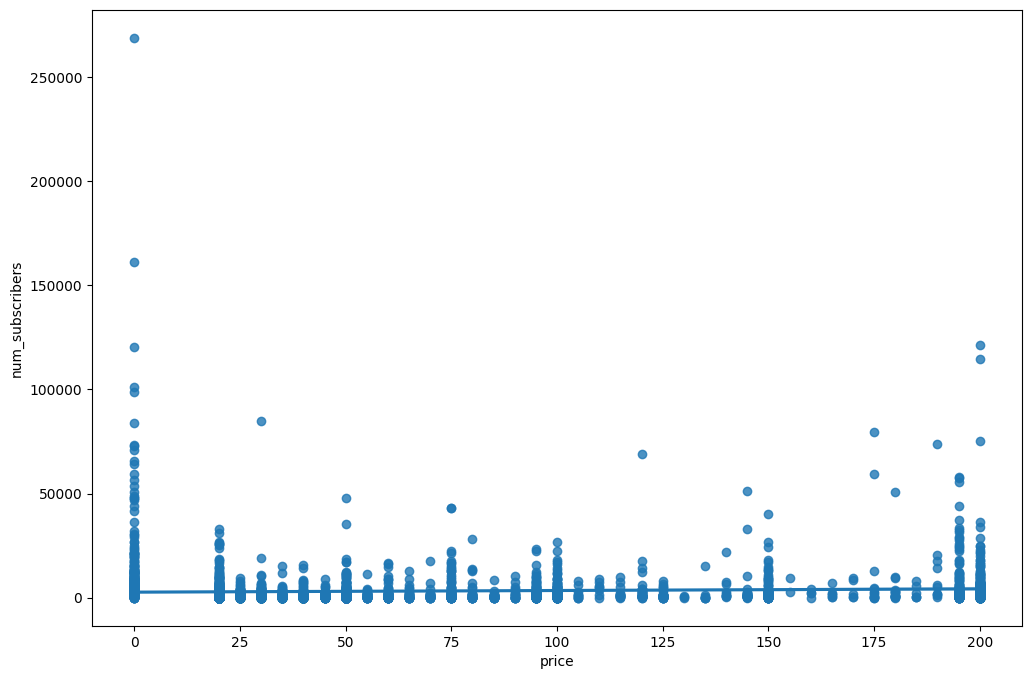

In [16]:
# visualize subscribers with price
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="num_subscribers" , data=df)

<Axes: xlabel='price', ylabel='num_reviews'>

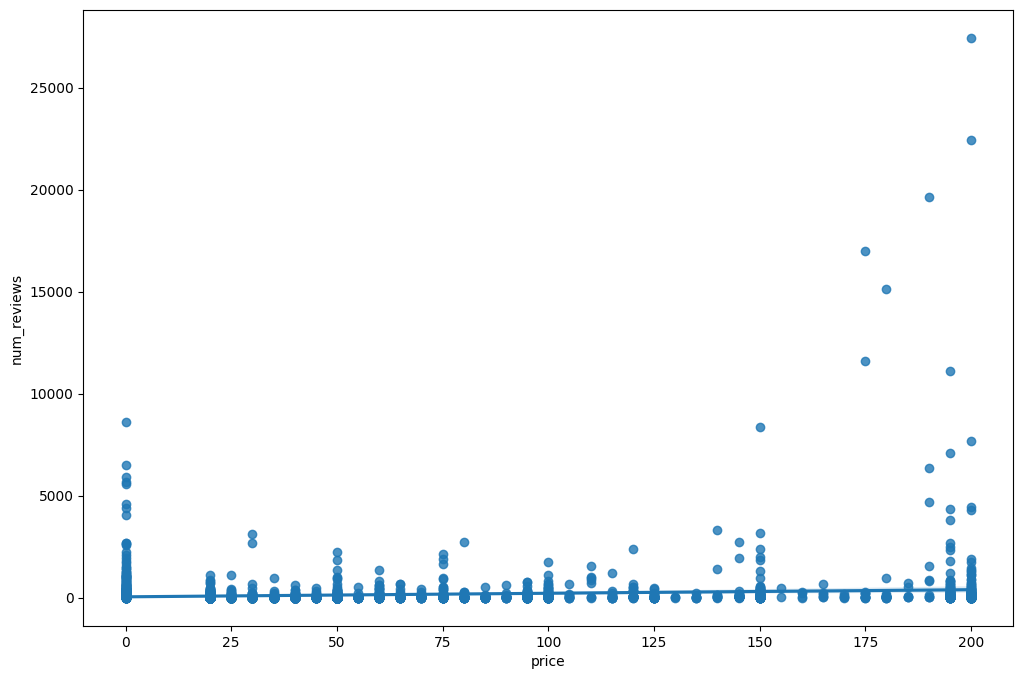

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="num_reviews" , data=df)

Insight: Price Does Not Affect Reviews

<Axes: xlabel='price', ylabel='content_duration'>

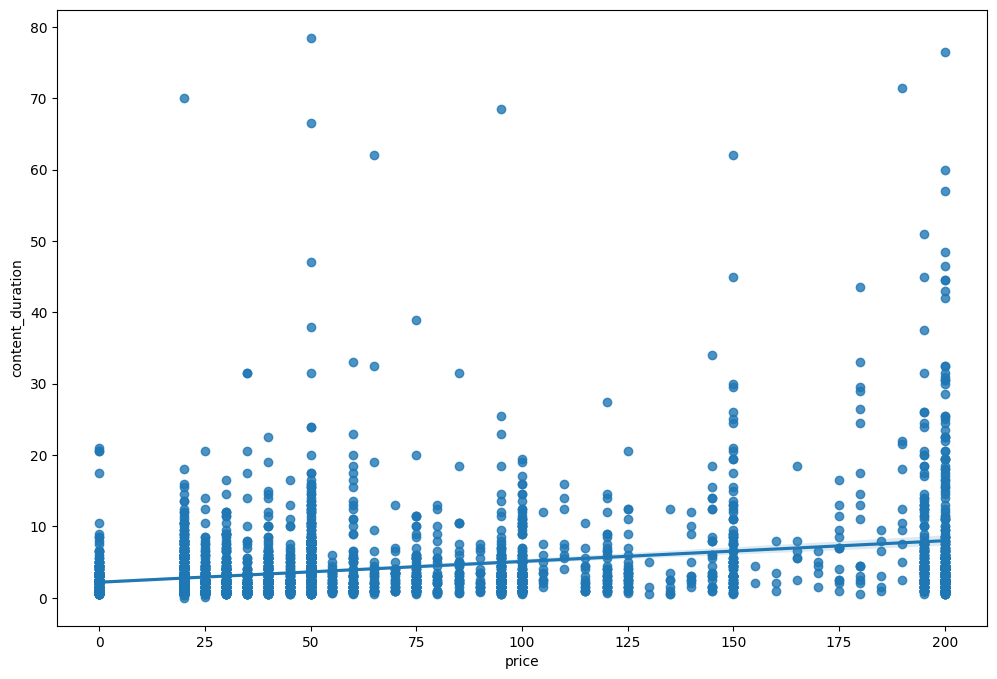

In [18]:
# price vs course duration
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="content_duration" , data=df)

Insight: Price Does Not Affect Course Duration

<Axes: xlabel='num_subscribers', ylabel='content_duration'>

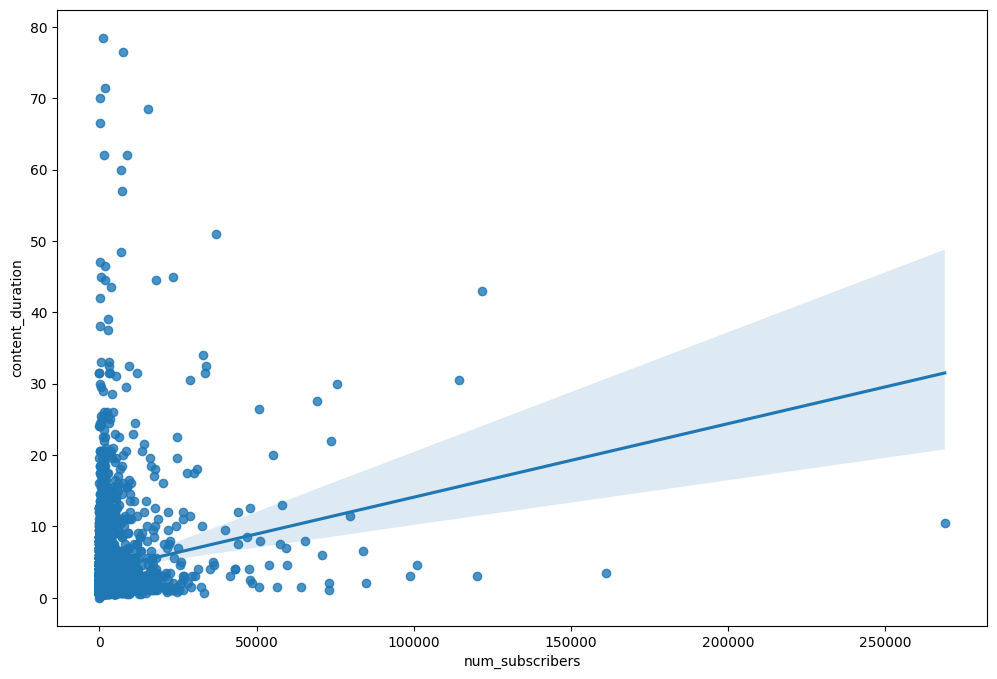

In [19]:
# course duration vs num of subscribers
plt.figure(figsize=(12,8))
sns.regplot(x="num_subscribers" , y="content_duration" , data=df)

Insight: probably course time affect course subscribers

<Axes: xlabel='num_subscribers', ylabel='num_reviews'>

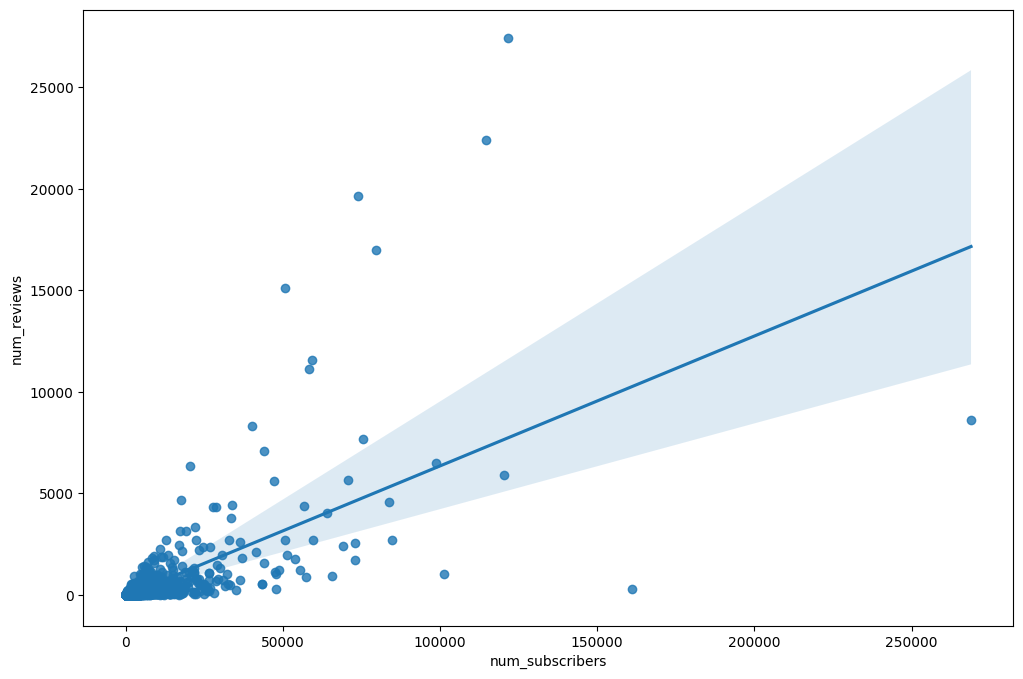

In [20]:
# num of subscribers vs num of reviews
plt.figure(figsize=(12,8))
sns.regplot(x="num_subscribers" , y="num_reviews" , data=df)

Insight: More Subscribers leads to more reviews

## Model Building, Evaluation & Tuning

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
# Select only numerical columns for features
X = df.select_dtypes(include=np.number)
y = df['is_paid'] if 'is_paid' in df.columns else pd.Series([0]*len(df))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Trying multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\nModel: {name}')
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
              precision    recall  f1-score   support

       False       1.00      0.92      0.96        71
        True       0.99      1.00      1.00       665

    accuracy                           0.99       736
   macro avg       1.00      0.96      0.98       736
weighted avg       0.99      0.99      0.99       736


Model: Decision Tree
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        71
        True       1.00      1.00      1.00       665

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736


Model: Random Forest
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        71
        True       1.00      1.00      1.00       665

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
we

## Storytelling and Communication of Results

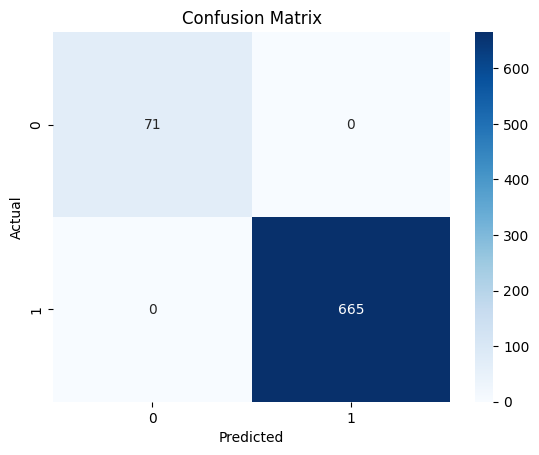

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
best_model = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': None, 'n_estimators': 50}


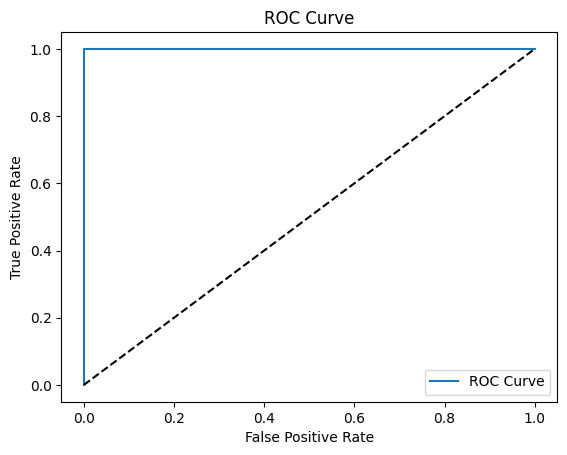

In [25]:
# ROC Curve
if len(np.unique(y_test)) == 2:
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

## Business Recommendations using SQLite

In [26]:
import sqlite3

# Connect to SQLite database (this will create a new database if it doesn't exist)
conn = sqlite3.connect('course_analysis.db')
cursor = conn.cursor()

# Create a table to store course data and model predictions
cursor.execute('''
CREATE TABLE IF NOT EXISTS course_data (
    course_id INTEGER PRIMARY KEY,
    course_title TEXT,
    price REAL,
    num_subscribers INTEGER,
    num_reviews INTEGER,
    content_duration REAL,
    level TEXT,
    subject TEXT,
    predicted_is_paid INTEGER,
    feature_importance REAL
)
''')

# Commit changes and close the connection
conn.commit()


In [27]:
test_df = df.iloc[X_test.index]

# Iterate over the predictions and insert them into the SQLite table
for index, (prediction, row_index) in enumerate(zip(y_pred, X_test.index)):
    row = df.loc[row_index]  # Access the original DataFrame (df) using the index from X_test

    # Explicitly cast all columns to the expected data types
    course_id = int(row['course_id'])
    course_title = str(row['course_title'])
    price = float(row['price'])
    num_subscribers = int(row['num_subscribers'])
    num_reviews = int(row['num_reviews'])
    content_duration = float(row['content_duration'])
    level = str(row['level'])
    subject = str(row['subject'])
    predicted_is_paid = int(prediction)
    feature_importance = None
    actual_is_paid = 1 if row['is_paid'] else 0

    # Insert course data along with the predicted values
    cursor.execute('''
    INSERT OR REPLACE INTO course_data (
        course_id,
        course_title,
        price,
        num_subscribers,
        num_reviews,
        content_duration,
        level,
        subject,
        predicted_is_paid,
        feature_importance
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        course_id,
        course_title,
        price,
        num_subscribers,
        num_reviews,
        content_duration,
        level,
        subject,
        predicted_is_paid,  # Insert the predicted value
        feature_importance  # You can add feature importance if calculated
    ))

# Commit the transaction to save the data into SQLite
conn.commit()


In [43]:
def get_courses(preference=None, subject=None, free_only=False, top_n=5):
    conn = sqlite3.connect('course_analysis.db')
    cursor = conn.cursor()

    query = "SELECT course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject FROM course_data WHERE 1=1"

    if preference:
        if preference == "free":
            query += " AND price = 0"
        elif preference == "paid":
            query += " AND price > 0"

    if subject:
        query += f" AND subject = '{subject}'"

    query += " ORDER BY num_subscribers DESC, num_reviews DESC LIMIT ?"

    cursor.execute(query, (top_n,))

    courses = cursor.fetchall()

    cursor.execute("SELECT COUNT(*) FROM course_data WHERE price = 0")
    free_courses_count = cursor.fetchone()[0]

    cursor.execute("SELECT COUNT(*) FROM course_data WHERE price > 0")
    paid_courses_count = cursor.fetchone()[0]

    print(f"\nTotal Free Courses: {free_courses_count}")
    print(f"Total Paid Courses: {paid_courses_count}")

    if courses:
        print(f"\nTop {top_n} recommended courses based on your preferences:")
        for course in courses:
            course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject = course
            print(f"\nCourse ID: {course_id}")
            print(f"Title: {course_title}")
            print(f"Price: ${price}")
            print(f"Subscribers: {num_subscribers}")
            print(f"Reviews: {num_reviews}")
            print(f"Content Duration: {content_duration} hours")
            print(f"Level: {level}")
            print(f"Subject: {subject}")
            print("-" * 50)
    else:
        print("No courses found based on the given criteria.")

In [44]:
get_courses(preference='free', subject='Business Finance', top_n=3)


Total Free Courses: 71
Total Paid Courses: 665

Top 3 recommended courses based on your preferences:

Course ID: 196620
Title: Como Investir em Ações para Iniciantes
Price: $0.0
Subscribers: 6024
Reviews: 890
Content Duration: 1.0 hours
Level: All Levels
Subject: Business Finance
--------------------------------------------------

Course ID: 805336
Title: Introductory Forex Trading Course
Price: $0.0
Subscribers: 5931
Reviews: 158
Content Duration: 3.5 hours
Level: Beginner Level
Subject: Business Finance
--------------------------------------------------

Course ID: 41973
Title: Silver, Gold, and Inflation
Price: $0.0
Subscribers: 5597
Reviews: 76
Content Duration: 1.0 hours
Level: Beginner Level
Subject: Business Finance
--------------------------------------------------


### Most Popular Courses

In [30]:
def get_most_popular_courses(preference=None, top_n=5):
    conn = sqlite3.connect('course_analysis.db')
    cursor = conn.cursor()

    query = "SELECT course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject FROM course_data WHERE 1=1"

    if preference:
        if preference == "free":
            query += " AND price = 0"
        elif preference == "paid":
            query += " AND price > 0"

    query += " ORDER BY num_subscribers DESC LIMIT ?"

    cursor.execute(query, (top_n,))

    courses = cursor.fetchall()

    if courses:
        print(f"Top {top_n} Most Popular Courses Based on Subscribers:")
        for course in courses:
            course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject = course
            print(f"\nCourse ID: {course_id}")
            print(f"Title: {course_title}")
            print(f"Price: ${price}")
            print(f"Subscribers: {num_subscribers}")
            print(f"Reviews: {num_reviews}")
            print(f"Content Duration: {content_duration} hours")
            print(f"Level: {level}")
            print(f"Subject: {subject}")
            print("-" * 50)
    else:
        print("No courses found based on the given criteria.")

In [31]:
get_most_popular_courses(preference='free', top_n=3)

Top 3 Most Popular Courses Based on Subscribers:

Course ID: 405926
Title: HTML and CSS for Beginners - Build a Website & Launch ONLINE
Price: $0.0
Subscribers: 70773
Reviews: 5660
Content Duration: 6.0 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 348116
Title: Photoshop In-Depth: Master all of Photoshop's Tools Easily
Price: $0.0
Subscribers: 53851
Reviews: 1779
Content Duration: 4.5 hours
Level: All Levels
Subject: Graphic Design
--------------------------------------------------

Course ID: 41884
Title: Getting Started with Playing Guitar
Price: $0.0
Subscribers: 47652
Reviews: 1141
Content Duration: 4.0 hours
Level: Beginner Level
Subject: Musical Instruments
--------------------------------------------------


In [32]:
get_most_popular_courses(preference='paid', top_n=3)

Top 3 Most Popular Courses Based on Subscribers:

Course ID: 364426
Title: JavaScript: Understanding the Weird Parts
Price: $175.0
Subscribers: 79612
Reviews: 16976
Content Duration: 11.5 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 80940
Title: Build Websites from Scratch with HTML & CSS
Price: $145.0
Subscribers: 51257
Reviews: 1955
Content Duration: 8.0 hours
Level: Beginner Level
Subject: Web Development
--------------------------------------------------

Course ID: 28295
Title: Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours
Price: $75.0
Subscribers: 43285
Reviews: 525
Content Duration: 4.0 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------


### Highly rated courses

In [33]:
def get_highly_rated_courses(preference=None, top_n=5):
    conn = sqlite3.connect('course_analysis.db')
    cursor = conn.cursor()

    query = "SELECT course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject FROM course_data WHERE 1=1"

    if preference:
        if preference == "free":
            query += " AND price = 0"
        elif preference == "paid":
            query += " AND price > 0"

    query += " ORDER BY num_reviews DESC LIMIT ?"

    cursor.execute(query, (top_n,))

    courses = cursor.fetchall()

    if courses:
        print(f"Top {top_n} Highest-Rated Courses Based on Reviews:")
        for course in courses:
            course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject = course
            print(f"\nCourse ID: {course_id}")
            print(f"Title: {course_title}")
            print(f"Price: ${price}")
            print(f"Subscribers: {num_subscribers}")
            print(f"Reviews: {num_reviews}")
            print(f"Content Duration: {content_duration} hours")
            print(f"Level: {level}")
            print(f"Subject: {subject}")
            print("-" * 50)
    else:
        print("No courses found based on the given criteria.")

In [34]:
get_highly_rated_courses(preference='free', top_n=3)

Top 3 Highest-Rated Courses Based on Reviews:

Course ID: 405926
Title: HTML and CSS for Beginners - Build a Website & Launch ONLINE
Price: $0.0
Subscribers: 70773
Reviews: 5660
Content Duration: 6.0 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 772618
Title: Learn Object Oriented PHP By Building a Complete Website
Price: $0.0
Subscribers: 36322
Reviews: 2618
Content Duration: 4.5 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 348116
Title: Photoshop In-Depth: Master all of Photoshop's Tools Easily
Price: $0.0
Subscribers: 53851
Reviews: 1779
Content Duration: 4.5 hours
Level: All Levels
Subject: Graphic Design
--------------------------------------------------


In [35]:
get_highly_rated_courses(preference='paid', top_n=3)

Top 3 Highest-Rated Courses Based on Reviews:

Course ID: 364426
Title: JavaScript: Understanding the Weird Parts
Price: $175.0
Subscribers: 79612
Reviews: 16976
Content Duration: 11.5 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 851712
Title: The Complete JavaScript Course: Build a Real-World Project
Price: $195.0
Subscribers: 27801
Reviews: 4340
Content Duration: 17.5 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------

Course ID: 405282
Title: PHP for Beginners -Become a PHP Master - Project Included
Price: $200.0
Subscribers: 28880
Reviews: 4316
Content Duration: 30.5 hours
Level: All Levels
Subject: Web Development
--------------------------------------------------


### Low engagement courses

In [36]:
def get_low_engagement_courses(threshold_subscribers=100, threshold_reviews=10, top_n=5):
    conn = sqlite3.connect('course_analysis.db')
    cursor = conn.cursor()

    query = "SELECT course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject FROM course_data WHERE num_subscribers < ? AND num_reviews < ?"

    cursor.execute(query, (threshold_subscribers, threshold_reviews))

    courses = cursor.fetchall()

    if courses:
        print(f"Top {top_n} Courses with Low Engagement (Subscribers < {threshold_subscribers} and Reviews < {threshold_reviews}):")
        for course in courses[:top_n]:
            course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject = course
            print(f"\nCourse ID: {course_id}")
            print(f"Title: {course_title}")
            print(f"Price: ${price}")
            print(f"Subscribers: {num_subscribers}")
            print(f"Reviews: {num_reviews}")
            print(f"Content Duration: {content_duration} hours")
            print(f"Level: {level}")
            print(f"Subject: {subject}")
            print("-" * 50)
    else:
        print("No low engagement courses found based on the given criteria.")

In [37]:
get_low_engagement_courses(threshold_subscribers=100, threshold_reviews=10, top_n=5)

Top 5 Courses with Low Engagement (Subscribers < 100 and Reviews < 10):

Course ID: 24815
Title: Harnessing the Power of Growth Stocks
Price: $50.0
Subscribers: 29
Reviews: 2
Content Duration: 2.0 hours
Level: Intermediate Level
Subject: Business Finance
--------------------------------------------------

Course ID: 31150
Title: Advance Design of Logos and Brand Identity   
Price: $20.0
Subscribers: 34
Reviews: 4
Content Duration: 2.0 hours
Level: All Levels
Subject: Graphic Design
--------------------------------------------------

Course ID: 34332
Title: Aprende a tocar la guitarra
Price: $50.0
Subscribers: 7
Reviews: 1
Content Duration: 1.5 hours
Level: All Levels
Subject: Musical Instruments
--------------------------------------------------

Course ID: 43291
Title: La costruzione del budget di una proposta comunitaria
Price: $50.0
Subscribers: 10
Reviews: 1
Content Duration: 1.0 hours
Level: Intermediate Level
Subject: Business Finance
---------------------------------------------

### Courses by level (Beginner Level, Intermediate Level, Advanced Level)

In [41]:
def get_courses_by_level(level, top_n=5):
    conn = sqlite3.connect('course_analysis.db')
    cursor = conn.cursor()

    query = "SELECT course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject FROM course_data WHERE level = ? LIMIT ?"

    cursor.execute(query, (level, top_n))

    courses = cursor.fetchall()

    if courses:
        print(f"Top {top_n} Courses for {level}:")
        for course in courses:
            course_id, course_title, price, num_subscribers, num_reviews, content_duration, level, subject = course
            print(f"\nCourse ID: {course_id}")
            print(f"Title: {course_title}")
            print(f"Price: ${price}")
            print(f"Subscribers: {num_subscribers}")
            print(f"Reviews: {num_reviews}")
            print(f"Content Duration: {content_duration} hours")
            print(f"Level: {level}")
            print(f"Subject: {subject}")
            print("-" * 50)
    else:
        print("No courses found for the given skill level.")

In [42]:
get_courses_by_level(level='Beginner Level', top_n=5)

Top 5 Courses for Beginner Level:

Course ID: 21080
Title: Guitar Essentials
Price: $20.0
Subscribers: 261
Reviews: 1
Content Duration: 1.5 hours
Level: Beginner Level
Subject: Musical Instruments
--------------------------------------------------

Course ID: 24877
Title: Introductory Financial Accounting
Price: $80.0
Subscribers: 1793
Reviews: 265
Content Duration: 10.0 hours
Level: Beginner Level
Subject: Business Finance
--------------------------------------------------

Course ID: 26956
Title: Learn Guitar in 21 Days
Price: $20.0
Subscribers: 26504
Reviews: 192
Content Duration: 2.5 hours
Level: Beginner Level
Subject: Musical Instruments
--------------------------------------------------

Course ID: 41145
Title: Learn Call Options and Put Options - Introduction to Options
Price: $60.0
Subscribers: 1017
Reviews: 74
Content Duration: 3.0 hours
Level: Beginner Level
Subject: Business Finance
--------------------------------------------------

Course ID: 41884
Title: Getting Started 